<a href="https://colab.research.google.com/github/havaledar/ECON3740/blob/main/Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install wooldridge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 34.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import wooldridge
import plotly.graph_objs as go

# Regression plots

In [10]:
x2, x3 = np.arange(-3, 4, 1), np.arange(-3, 4, 1)
X2, X3 = np.meshgrid(x2, x3) # this is coordinates on X2-X3 plane

In [11]:
u = np.random.randn(7, 7)*3

In [12]:
Y = 1 + 2*X2 + 3*X3 # plane without disturbance term
Yu = 1 + 2*X2 + 3*X3 + u # with disturbance term

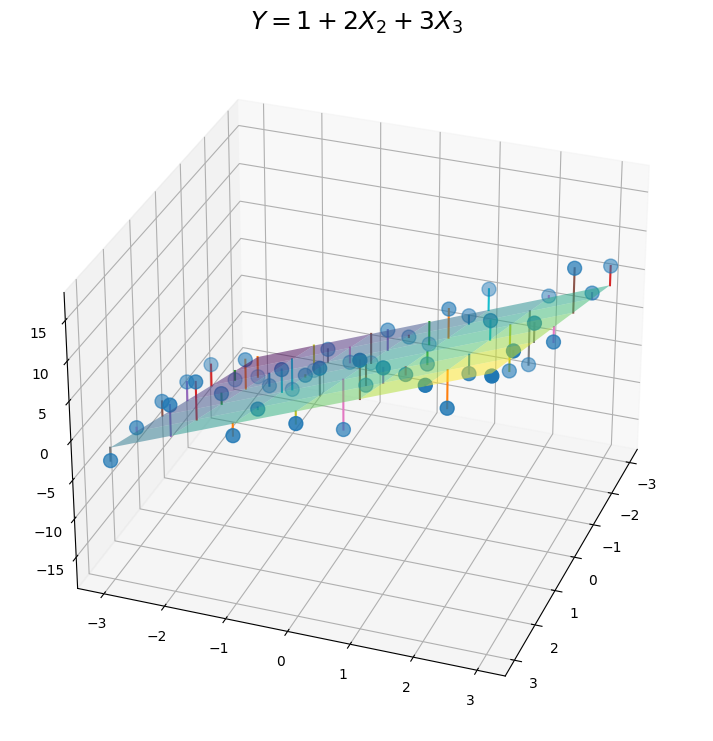

In [13]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')

ax.set_title('$Y=1+2X_2+3X_3$', size = 18)
ax.view_init(elev=30, azim=20)
ax.plot_surface(X2, X3, Y, cmap ='viridis', alpha=.5) # MATLAB default color map
ax.scatter(X2, X3, Yu, s = 100)

for i in range(len(X2.flatten())):
    ax.plot([X2.flatten()[i],X2.flatten()[i]], [X3.flatten()[i],X3.flatten()[i]], [Y.flatten()[i], Yu.flatten()[i]])
plt.show()

In [15]:
fig = go.Figure()

# Create a 3D surface plot for Y = 1 + 2*X2 + 3*X3
fig.add_trace(go.Surface(x=X2, y=X3, z=Y, colorscale='Viridis', opacity=0.5))

# Create a scatter plot for Yu = 1 + 2*X2 + 3*X3 + u
fig.add_trace(go.Scatter3d(x=X2.flatten(), y=X3.flatten(), z=Yu.flatten(), mode='markers', marker=dict(size=5)))

# Add connecting lines
for i in range(len(X2.flatten())):
    fig.add_trace(go.Scatter3d(x=[X2.flatten()[i], X2.flatten()[i]],
                                y=[X3.flatten()[i], X3.flatten()[i]],
                                z=[Y.flatten()[i], Yu.flatten()[i]],
                                mode='lines',
                                line=dict(color='black')))

# Update layout
fig.update_layout(scene=dict(
                    xaxis_title='X2',
                    yaxis_title='X3',
                    zaxis_title='Y'
                ),
                margin=dict(l=0, r=0, b=0, t=0))

# Show plot
fig.show()

In [8]:
wage = wooldridge.data('wage2')

In [ ]:
x2 = wage['educ'][:50].values
x3 = wage['exper'][:50].values
X2, X3 = np.meshgrid(x2, x3)

In [ ]:
model = smf.ols(formula='wage ~ educ + exper', data=wage[:50])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.697
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.194
Time:                        23:39:33   Log-Likelihood:                -371.85
No. Observations:                  50   AIC:                             749.7
Df Residuals:                      47   BIC:                             755.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.6605    600.645      0.224      0.8

In [ ]:
u = np.random.randn(len(X2), len(X3))*300

In [ ]:
Y = 134.6605 + 55.5514*X2 + 14.9509*X3

In [ ]:
Yu = Y + u

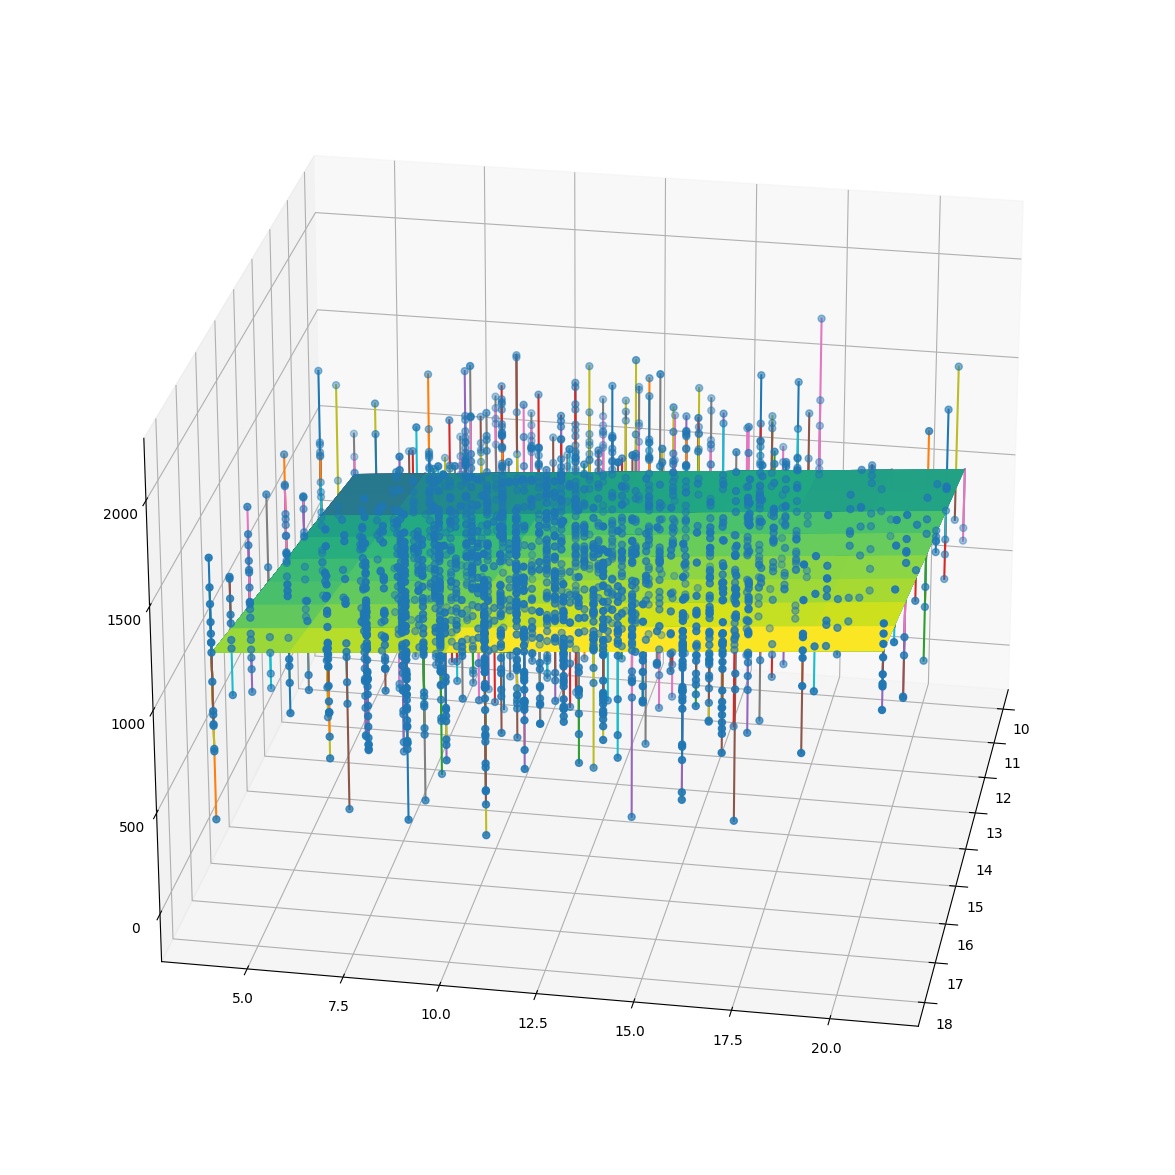

In [ ]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection = '3d')

ax.view_init(elev=25, azim=10)
ax.plot_surface(X2, X3, Y, cmap ='viridis', alpha=.5)
ax.scatter(X2, X3, Yu, s = 25)

for i in range(len(X2.flatten())):
    ax.plot([X2.flatten()[i],X2.flatten()[i]], [X3.flatten()[i],X3.flatten()[i]], [Y.flatten()[i], Yu.flatten()[i]])
plt.show()

# Correlation Matrix

In [ ]:
wage.corr()

In [ ]:
n = 1000
x1 = np.random.randn(n)
x2 = np.random.rand(n)
x3 = sp.stats.t.rvs(100, loc=0, scale=1, size=n)
x4 = x2*x1-x3
x5 = x2/x3
x6 = np.log(x2)

In [ ]:
df = pd.DataFrame([x1, x2, x3, x4, x5, x6]).T
df.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
df.corr()

x1        x2        x3        x4        x5        x6
x1  1.000000 -0.023138 -0.003412  0.425630  0.028602 -0.023609
x2 -0.023138  1.000000 -0.010173 -0.003689  0.017031  0.865639
x3 -0.003412 -0.010173  1.000000 -0.873099  0.006249 -0.039786
x4  0.425630 -0.003689 -0.873099  1.000000  0.011210  0.032269
x5  0.028602  0.017031  0.006249  0.011210  1.000000  0.016817
x6 -0.023609  0.865639 -0.039786  0.032269  0.016817  1.000000

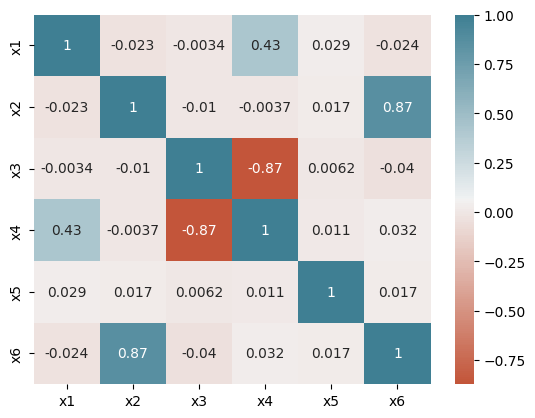

In [ ]:
sns.heatmap(df.corr(),
            annot = True,
            cmap=sns.diverging_palette(20, 220, n=200)); plt.show()

# Scatter plots

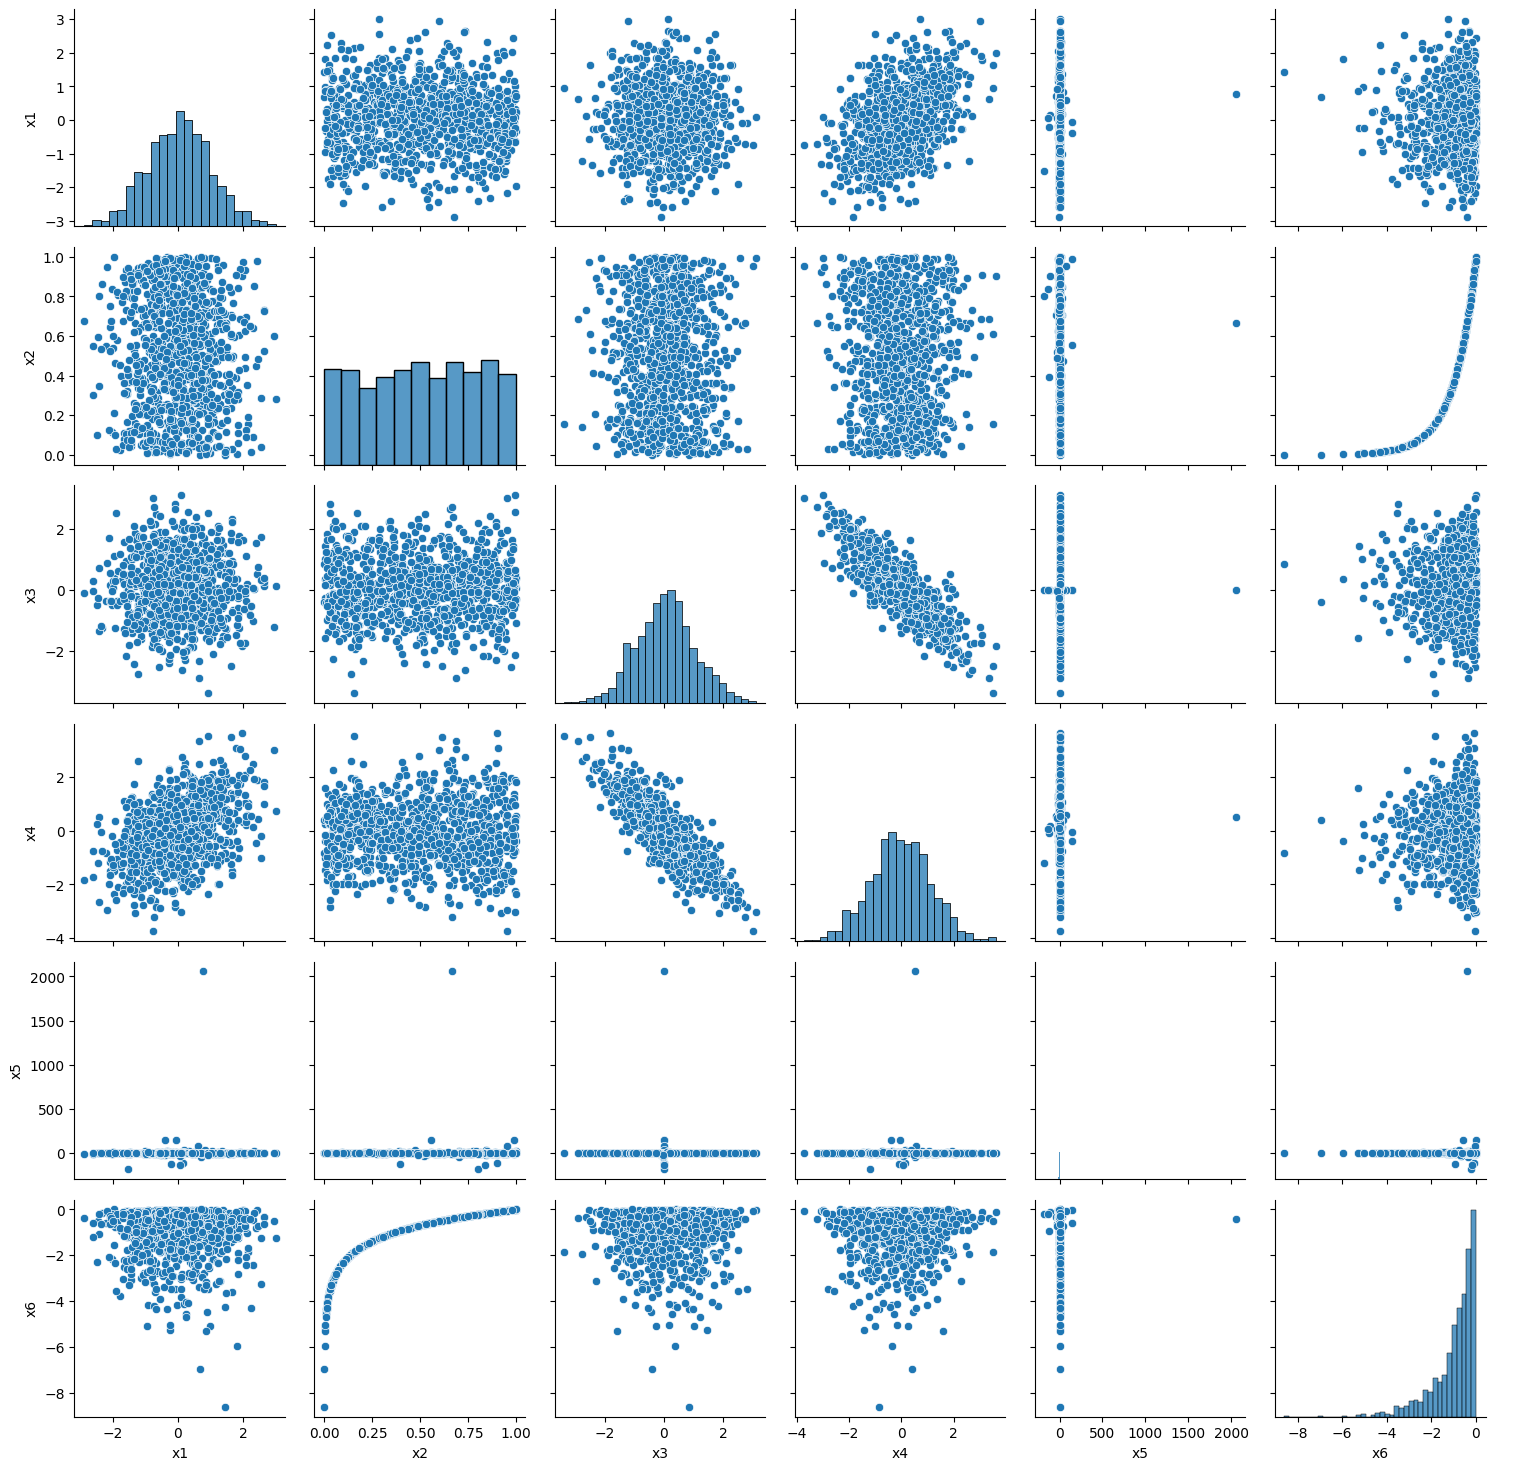

In [ ]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

In [ ]:
wage_4 = wage[['wage', 'educ', 'exper', 'tenure']]

In [16]:
wage.corr()

wage     hours        IQ       KWW      educ     exper    tenure  \
wage     1.000000 -0.009504  0.309088  0.326131  0.327109  0.002190  0.128266   
hours   -0.009504  1.000000  0.073839  0.113889  0.091009 -0.062126 -0.055528   
IQ       0.309088  0.073839  1.000000  0.413516  0.515697 -0.224913  0.042159   
KWW      0.326131  0.113889  0.413516  1.000000  0.388134  0.017452  0.141398   
educ     0.327109  0.091009  0.515697  0.388134  1.000000 -0.455573 -0.036167   
exper    0.002190 -0.062126 -0.224913  0.017452 -0.455573  1.000000  0.243654   
tenure   0.128266 -0.055528  0.042159  0.141398 -0.036167  0.243654  1.000000   
age      0.156702  0.024812 -0.043741  0.393053 -0.012254  0.495330  0.270602   
married  0.136583  0.032563 -0.014668  0.089948 -0.058566  0.106349  0.072605   
black   -0.210878 -0.107850 -0.387869 -0.280753 -0.179457  0.055849 -0.078236   
south   -0.159387 -0.029519 -0.209785 -0.094392 -0.097033  0.021257 -0.061691   
urban    0.198406  0.016573  0.038936  0.098190  0.072151 -0.047386 -0.038486   
sibs    -0.159204 -0.049603 -0.284773 -0.284975 -0.239288  0.064310 -0.039161   
brthord -0.145485 -0.043130 -0.179439 -0.153585 -0.204992  0.088300 -0.028478   
meduc    0.214832  0.076620  0.331804  0.240792  0.364239 -0.186317 -0.014968   
feduc    0.237587  0.063172  0.343908  0.234889  0.426925 -0.256793 -0.059241   
lwage    0.953141 -0.047219  0.314788  0.306271  0.312117  0.020601  0.185853   

              age   married     black     south     urban      sibs   brthord  \
wage     0.156702  0.136583 -0.210878 -0.159387  0.198406 -0.159204 -0.145485   
hours    0.024812  0.032563 -0.107850 -0.029519  0.016573 -0.049603 -0.043130   
IQ      -0.043741 -0.014668 -0.387869 -0.209785  0.038936 -0.284773 -0.179439   
KWW      0.393053  0.089948 -0.280753 -0.094392  0.098190 -0.284975 -0.153585   
educ    -0.012254 -0.058566 -0.179457 -0.097033  0.072151 -0.239288 -0.204992   
exper    0.495330  0.106349  0.055849  0.021257 -0.047386  0.064310  0.088300   
tenure   0.270602  0.072605 -0.078236 -0.061691 -0.038486 -0.039161 -0.028478   
age      1.000000  0.106980 -0.035646 -0.029478 -0.006749 -0.040719  0.005436   
married  0.106980  1.000000 -0.053448  0.022757 -0.040248 -0.004327 -0.014737   
black   -0.035646 -0.053448  1.000000  0.236458  0.070200  0.305277  0.103371   
south   -0.029478  0.022757  0.236458  1.000000 -0.109898  0.066320  0.093707   
urban   -0.006749 -0.040248  0.070200 -0.109898  1.000000 -0.031469  0.002420   
sibs    -0.040719 -0.004327  0.305277  0.066320 -0.031469  1.000000  0.593914   
brthord  0.005436 -0.014737  0.103371  0.093707  0.002420  0.593914  1.000000   
meduc   -0.029319 -0.022763 -0.221198 -0.157874  0.034024 -0.287151 -0.275934   
feduc   -0.071303 -0.020324 -0.199503 -0.172363  0.112239 -0.232026 -0.230371   
lwage    0.161822  0.149976 -0.232071 -0.194811  0.203798 -0.152809 -0.141853   

            meduc     feduc     lwage  
wage     0.214832  0.237587  0.953141  
hours    0.076620  0.063172 -0.047219  
IQ       0.331804  0.343908  0.314788  
KWW      0.240792  0.234889  0.306271  
educ     0.364239  0.426925  0.312117  
exper   -0.186317 -0.256793  0.020601  
tenure  -0.014968 -0.059241  0.185853  
age     -0.029319 -0.071303  0.161822  
married -0.022763 -0.020324  0.149976  
black   -0.221198 -0.199503 -0.232071  
south   -0.157874 -0.172363 -0.194811  
urban    0.034024  0.112239  0.203798  
sibs    -0.287151 -0.232026 -0.152809  
brthord -0.275934 -0.230371 -0.141853  
meduc    1.000000  0.576495  0.213575  
feduc    0.576495  1.000000  0.223385  
lwage    0.213575  0.223385  1.000000

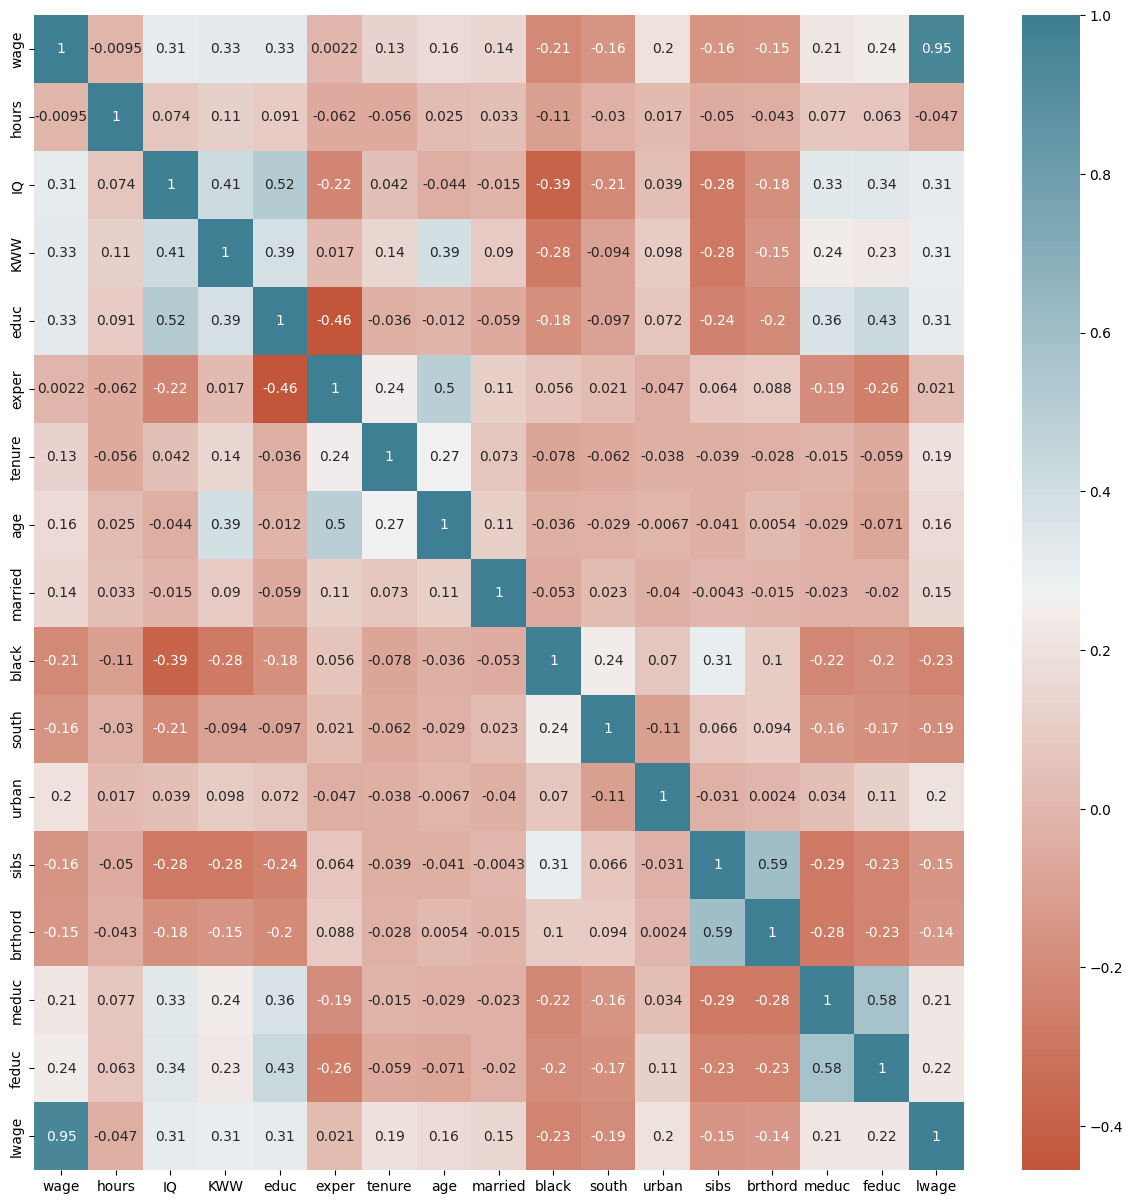

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(wage.corr(),
            annot = True,
            cmap=sns.diverging_palette(20, 220, n=200)); plt.show()

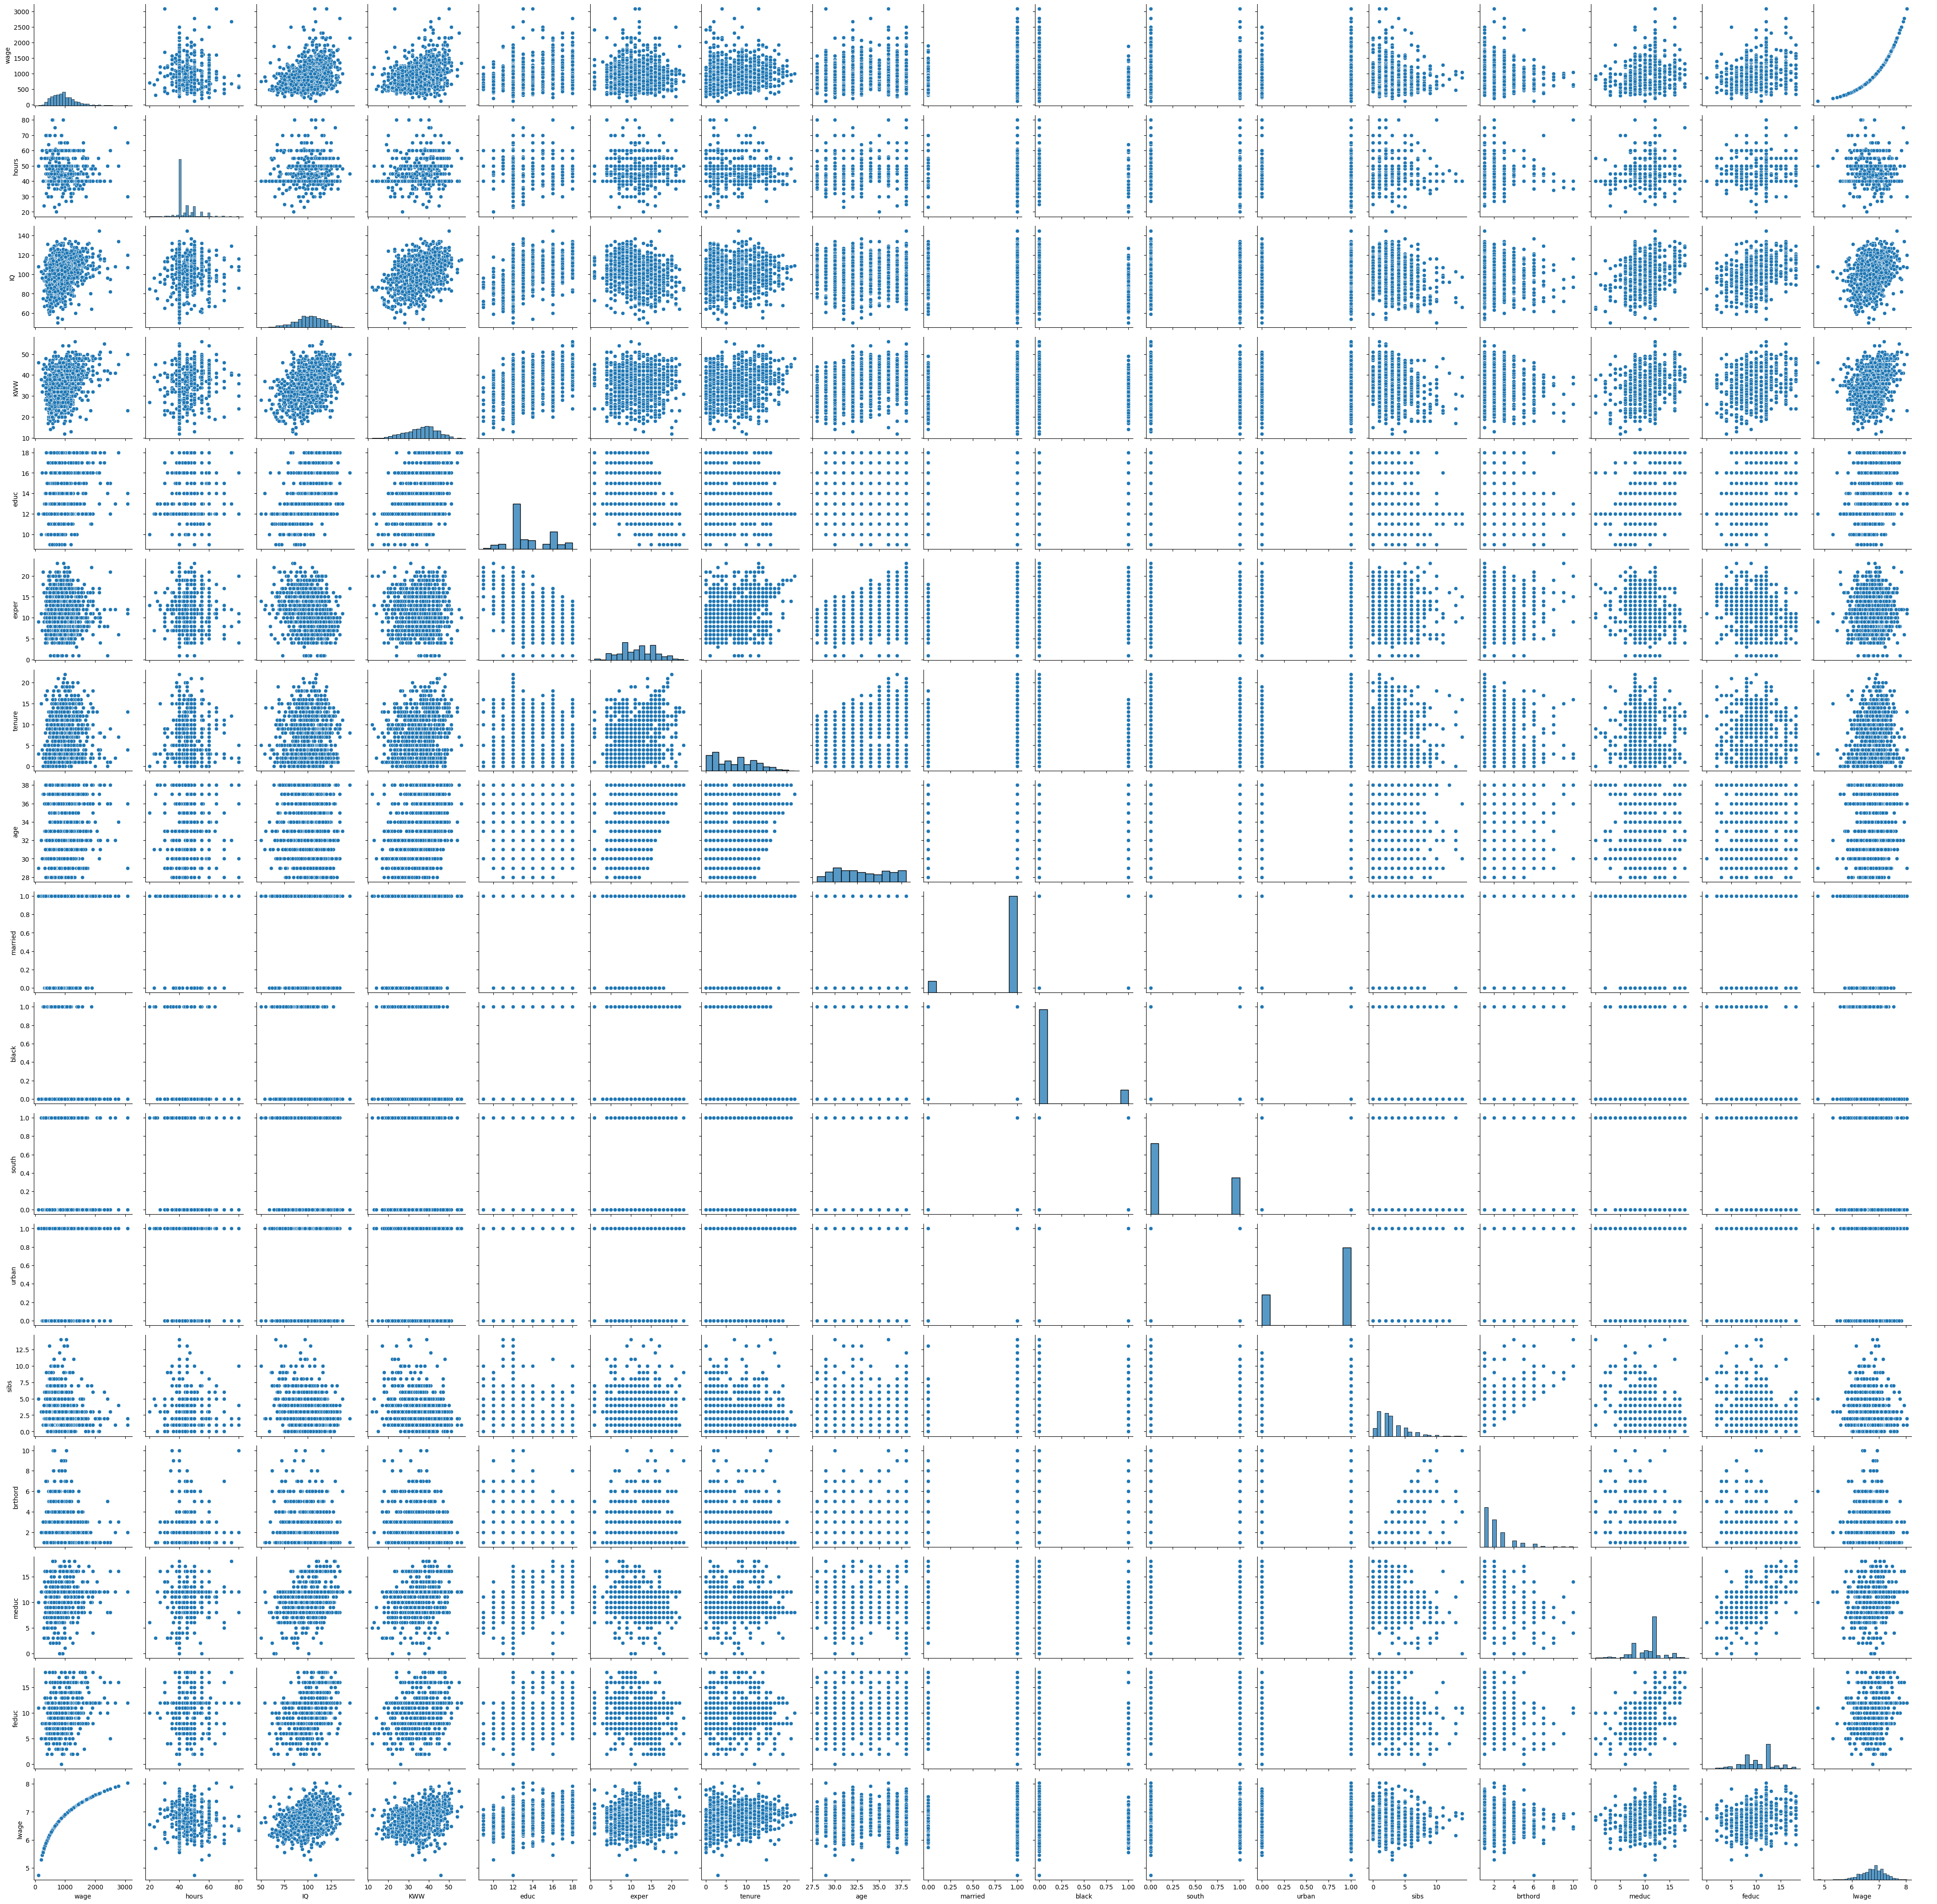

In [ ]:
g = sns.PairGrid(wage)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

There are more examples [here](https://github.com/weijie-chen/Econometrics-With-Python).